In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/LR模型建立"

# **牡蠣圖庫(130資料)關係全特徵模型建立_linear(sklearn.linear_model)**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 載入資料數據集
df = pd.read_csv("/content/drive/MyDrive/OysterData(130).csv")
df

,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight
0,1.0,6.9,7.8,4.1,2.5,31.98,79.950,28.1,20.7,0.256228,0.2,7.2
1,2.0,6.3,7.8,5.2,3.6,40.56,146.016,50.0,42.4,0.180000,-1.4,9.0
2,3.0,9.1,10.5,4.6,2.1,48.30,101.430,38.0,27.1,0.281579,0.2,10.7
3,4.0,6.7,8.2,4.3,2.4,35.26,84.624,34.6,24.8,0.303468,-0.7,10.5
4,5.0,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
125,126.0,7.3,8.4,4.1,1.6,34.44,55.104,30.9,22.1,0.281553,0.1,8.7
126,127.0,6.9,7.5,4.6,2.3,34.50,79.350,30.6,20.8,0.297386,0.7,9.1
127,128.0,7.6,8.4,3.7,1.6,31.08,49.728,23.2,15.7,0.280172,1.0,6.5
128,129.0,6.8,8.3,4.4,2.2,36.52,80.344,34.6,23.5,0.294798,0.9,10.2


In [ ]:
import cv2
from pandas.core.common import flatten
from imutils import paths #路徑檔案管理

In [ ]:
# 載入資料特徵
df_x = df.drop(['牡蠣原始編號 Oyster Original Number','右殼長 Right Shell Length', '肉重 Meat Weight', "雜質重 Impurity Weight", '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '殼重 Shell Weight'], axis=1)

df_x

,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight
0,7.8,4.1,2.5,31.98,79.950,28.1
1,7.8,5.2,3.6,40.56,146.016,50.0
2,10.5,4.6,2.1,48.30,101.430,38.0
3,8.2,4.3,2.4,35.26,84.624,34.6
4,7.8,3.8,2.3,29.64,68.172,25.9
...,...,...,...,...,...,...
125,8.4,4.1,1.6,34.44,55.104,30.9
126,7.5,4.6,2.3,34.50,79.350,30.6
127,8.4,3.7,1.6,31.08,49.728,23.2
128,8.3,4.4,2.2,36.52,80.344,34.6


In [ ]:
data_x = df_x.iloc[:,:].values

In [ ]:
data_x

array([[  7.8  ,   4.1  ,   2.5  ,  31.98 ,  79.95 ,  28.1  ],
       [  7.8  ,   5.2  ,   3.6  ,  40.56 , 146.016,  50.   ],
       [ 10.5  ,   4.6  ,   2.1  ,  48.3  , 101.43 ,  38.   ],
       [  8.2  ,   4.3  ,   2.4  ,  35.26 ,  84.624,  34.6  ],
       [  7.8  ,   3.8  ,   2.3  ,  29.64 ,  68.172,  25.9  ],
       [  8.4  ,   4.1  ,   2.3  ,  34.44 ,  79.212,  33.4  ],
       [  9.4  ,   4.2  ,   2.1  ,  39.48 ,  82.908,  44.3  ],
       [  7.1  ,   4.2  ,   2.4  ,  29.82 ,  71.568,  28.8  ],
       [  9.2  ,   3.9  ,   1.9  ,  35.88 ,  68.172,  32.8  ],
       [  8.4  ,   4.4  ,   1.8  ,  36.96 ,  66.528,  31.8  ],
       [  7.9  ,   4.1  ,   2.5  ,  32.39 ,  80.975,  31.6  ],
       [  6.6  ,   4.3  ,   2.2  ,  28.38 ,  62.436,  28.6  ],
       [  6.8  ,   4.5  ,   2.9  ,  30.6  ,  88.74 ,  37.1  ],
       [  8.6  ,   4.5  ,   3.3  ,  38.7  , 127.71 ,  53.5  ],
       [  9.6  ,   4.8  ,   2.3  ,  46.08 , 105.984,  42.1  ],
       [ 10.1  ,   4.8  ,   2.1  ,  48.48 , 101.808,  4

In [ ]:
len(data_x)

130

In [ ]:
len(data_x[0])

6

In [ ]:
x = np.array(data_x)
y = df.iloc[:,-1].values

In [ ]:
x

array([[  7.8  ,   4.1  ,   2.5  ,  31.98 ,  79.95 ,  28.1  ],
       [  7.8  ,   5.2  ,   3.6  ,  40.56 , 146.016,  50.   ],
       [ 10.5  ,   4.6  ,   2.1  ,  48.3  , 101.43 ,  38.   ],
       [  8.2  ,   4.3  ,   2.4  ,  35.26 ,  84.624,  34.6  ],
       [  7.8  ,   3.8  ,   2.3  ,  29.64 ,  68.172,  25.9  ],
       [  8.4  ,   4.1  ,   2.3  ,  34.44 ,  79.212,  33.4  ],
       [  9.4  ,   4.2  ,   2.1  ,  39.48 ,  82.908,  44.3  ],
       [  7.1  ,   4.2  ,   2.4  ,  29.82 ,  71.568,  28.8  ],
       [  9.2  ,   3.9  ,   1.9  ,  35.88 ,  68.172,  32.8  ],
       [  8.4  ,   4.4  ,   1.8  ,  36.96 ,  66.528,  31.8  ],
       [  7.9  ,   4.1  ,   2.5  ,  32.39 ,  80.975,  31.6  ],
       [  6.6  ,   4.3  ,   2.2  ,  28.38 ,  62.436,  28.6  ],
       [  6.8  ,   4.5  ,   2.9  ,  30.6  ,  88.74 ,  37.1  ],
       [  8.6  ,   4.5  ,   3.3  ,  38.7  , 127.71 ,  53.5  ],
       [  9.6  ,   4.8  ,   2.3  ,  46.08 , 105.984,  42.1  ],
       [ 10.1  ,   4.8  ,   2.1  ,  48.48 , 101.808,  4

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(130, 6)

In [ ]:
y

array([ 7.2,  9. , 10.7, 10.5,  6.5,  8.5,  8.5,  7.1,  7.8,  8. ,  6.7,
        6.9, 10. , 13.4, 11.8, 11. , 11.2, 13.3,  6.3,  7.8,  6.1,  7.4,
        7. ,  8. ,  6.6,  7.3,  6.5, 13.2, 13.2,  8.9,  7.4,  5.2,  9. ,
        8.9, 29.7,  8. ,  9.6,  6.6,  8.3,  7.4,  5. ,  7.7,  4.9,  9.7,
       10.7, 10.5,  7.9, 13.7, 11.5, 10.2,  5.8,  5.4,  8.3,  3.6,  7.8,
        6.7,  5.8,  8.9,  7.5,  6.2,  6.1,  5.7,  4.5, 10.5,  6. ,  8.4,
        8.2,  9.4,  9.4,  5.4,  7.3,  7.5, 11. ,  7.5,  6.2, 11.9, 13.6,
        9.6,  8.9, 10.2,  7.6, 11.8,  8.2, 12.4,  8.2, 13.5, 10.8,  7.1,
       10. ,  9. ,  6.3, 13. ,  6.9,  7.7, 10. , 10.2,  7. , 10. ,  8. ,
        8.2,  9.2,  5.3,  8.3,  8.7,  6.6,  7.4,  7.9, 11.6,  7.3,  8. ,
       12.3,  8.2, 10.5,  7.3,  7.2, 11. , 10.8, 10.9,  4.8, 13.6,  9. ,
        8.6,  6.6,  8.1,  6.5,  8.7,  9.1,  6.5, 10.2,  5.8])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=3/10,random_state=0) # 設定訓練集與測試集比例

In [ ]:
# tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.experimental import LinearModel
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

In [ ]:
# 整數轉浮點數
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (91, 6)
91 train samples
39 test samples


In [ ]:
x_train

array([[  6.6  ,   4.4  ,   2.7  ,  29.04 ,  78.408,  35.9  ],
       [  8.2  ,   4.3  ,   2.4  ,  35.26 ,  84.624,  34.6  ],
       [  8.6  ,   4.5  ,   2.2  ,  38.7  ,  85.14 ,  36.9  ],
       [  9.4  ,   4.2  ,   2.1  ,  39.48 ,  82.908,  44.3  ],
       [  8.8  ,   4.5  ,   1.9  ,  39.6  ,  75.24 ,  36.   ],
       [  9.7  ,   4.5  ,   1.9  ,  43.65 ,  82.935,  37.6  ],
       [  8.6  ,   4.1  ,   2.3  ,  35.26 ,  81.098,  34.3  ],
       [  8.2  ,   4.7  ,   2.   ,  38.54 ,  77.08 ,  38.2  ],
       [  6.5  ,   4.7  ,   2.6  ,  30.55 ,  79.43 ,  28.1  ],
       [  7.9  ,   5.   ,   2.   ,  39.5  ,  79.   ,  25.4  ],
       [  7.8  ,   4.4  ,   2.2  ,  34.32 ,  75.504,  32.1  ],
       [  7.9  ,   4.5  ,   2.3  ,  35.55 ,  81.765,  31.8  ],
       [  9.3  ,   4.6  ,   2.6  ,  42.78 , 111.228,  59.   ],
       [  7.   ,   4.3  ,   2.3  ,  30.1  ,  69.23 ,  27.8  ],
       [  7.5  ,   4.4  ,   2.4  ,  33.   ,  79.2  ,  35.8  ],
       [  6.6  ,   4.3  ,   2.2  ,  28.38 ,  62.436,  2

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(91, 6)

In [ ]:
y_train

array([10.2, 10.5,  9.7,  8.5,  8.2,  7.8,  8.2, 10. ,  7.3,  5.7,  7.3,
        7.5, 13.2,  6.3, 11.6,  6.9,  6.5, 12.3,  7.7, 10.8,  6.1,  9. ,
        5.8,  8. , 10.5,  4.9,  6.5, 13.3,  8.3,  8.5,  3.6,  4.8,  5.3,
        7.2, 29.7, 13.2,  6.7, 11.9,  8. ,  8. ,  6.2,  5.2, 13.5,  8.9,
        9.2,  8.2,  9. ,  8. , 11.8,  9. ,  7.8,  8.9, 10.2,  7.9,  8.2,
        6.5,  5.8, 10.2,  5.4,  7.6,  6.1,  6.6, 11. ,  9.6,  7.3,  6.6,
       11.8, 13.6,  7.9, 10.2,  7.4,  8.3,  8.4,  7.5, 10. , 11. , 10. ,
        7.3,  7.1,  9.6,  7.2,  7.4, 12.4,  8. ,  8.7,  9.1,  8.1,  9.4,
        6. , 10.9, 13.7])

In [ ]:
# LR模型建立
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# LR模型訓練
%%time
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

CPU times: user 4.32 ms, sys: 1.07 ms, total: 5.39 ms
Wall time: 39.1 ms


LinearRegression()

In [ ]:
# 每一筆測試集資料預測值
y_pred = model.predict(x_test)
y_pred

array([ 8.220396 ,  8.703797 ,  7.5321674,  6.702265 ,  8.794281 ,
        7.273815 , 10.516376 , 11.562375 , 16.011587 ,  9.313358 ,
        7.910839 ,  7.473098 ,  7.378454 ,  6.536248 ,  7.846799 ,
       10.1051445,  8.38963  ,  7.8703585,  9.211594 ,  7.738495 ,
        7.3536453,  8.345568 ,  7.232952 ,  6.6843576,  7.442026 ,
        6.307334 ,  7.2013702,  8.150626 ,  7.5022984, 12.075573 ,
        5.4524574,  7.521906 , 12.602423 , 13.0589   ,  7.330988 ,
        9.472168 , 10.151081 , 12.116955 ,  8.95712  ], dtype=float32)

In [ ]:
# 每一筆測試集資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred)):
  print( "  " + str(ii) + "  " + str(y_test[ii])  + "  "  + str(y_pred[ii])  + "    "  + str(y_test[ii] - y_pred[ii]) )

    準確值    預測值         誤差值   
  0  7.8  8.220396    -0.42039604187011737
  1  6.2  8.703797    -2.5037973403930662
  2  6.9  7.5321674    -0.6321674346923825
  3  6.6  6.702265    -0.10226478576660192
  4  10.0  8.794281    1.205718994140625
  5  7.4  7.273815    0.12618484497070348
  6  10.7  10.516376    0.18362445831298757
  7  8.9  11.562375    -2.6623750686645504
  8  10.5  16.011587    -5.511587142944336
  9  6.5  9.313358    -2.8133583068847656
  10  7.5  7.910839    -0.4108390808105469
  11  7.1  7.473098    -0.37309780120849645
  12  7.0  7.378454    -0.37845420837402344
  13  7.4  6.536248    0.8637517929077152
  14  6.7  7.846799    -1.1467988967895506
  15  11.5  10.1051445    1.3948554992675781
  16  8.7  8.38963    0.310369682312011
  17  6.3  7.8703585    -1.570358467102051
  18  10.7  9.211594    1.4884063720703118
  19  7.7  7.738495    -0.03849487304687482
  20  8.3  7.3536453    0.9463546752929695
  21  7.0  8.345568    -1.3455677032470703
  22  6.6  7.232952    -0.6

In [ ]:
# 測試集資料之模型效能評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y_test)):
  yy = (y_test[k] - y_pred[k])/y_test[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y_test))
print("正確率 :", 1-(y_abs_s/len(y_test)))

0  -0.053896928444886846  0.053896928444886846
0.053896928444886846
1  -0.40383828070855904  0.40383828070855904
0.4577352091534459
2  -0.09161846879599746  0.09161846879599746
0.5493536779494433
3  -0.0154946645100912  0.0154946645100912
0.5648483424595345
4  0.1205718994140625  0.1205718994140625
0.6854202418735971
5  0.01705200607712209  0.01705200607712209
0.7024722479507192
6  0.017161164328316596  0.017161164328316596
0.7196334122790358
7  -0.2991432661420843  0.2991432661420843
1.01877667842112
8  -0.5249130612327939  0.5249130612327939
1.543689739653914
9  -0.43282435490534854  0.43282435490534854
1.9765140945592625
10  -0.05477854410807292  0.05477854410807292
2.0312926386673356
11  -0.05254898608570373  0.05254898608570373
2.083841624753039
12  -0.054064886910574775  0.054064886910574775
2.137906511663614
13  0.11672321525779934  0.11672321525779934
2.2546297269214133
14  -0.17116401444620158  0.17116401444620158
2.425793741367615
15  0.12129178254500679  0.12129178254500679


In [ ]:
# 每一筆訓練集資料預測值
y_pred_train = model.predict(x_train)
y_pred_train

array([ 9.258173 ,  8.575649 ,  9.269819 , 11.219474 ,  9.345068 ,
        9.566688 ,  8.481445 ,  9.95542  ,  6.8258963,  6.2388134,
        8.199369 ,  7.9166546, 14.798887 ,  7.2415686,  9.151055 ,
        7.7228756,  6.6354036, 10.234476 ,  9.098716 ,  9.538903 ,
        6.6323013, 11.020365 ,  8.067635 ,  7.907694 ,  8.145459 ,
        5.9197054,  6.6323185, 13.977155 ,  7.6553307,  8.322595 ,
        6.7405243,  5.4398327,  5.227047 ,  6.8990335, 29.272924 ,
       11.368084 ,  6.0721455, 12.731823 ,  7.9513035,  8.881737 ,
        7.7688437,  5.9542313, 10.604482 ,  9.080899 ,  8.303038 ,
        8.5561   ,  9.075839 ,  8.081397 , 10.352997 ,  9.411525 ,
        7.854397 , 10.225732 , 11.211768 ,  7.8533583,  7.7402754,
        6.2122917,  5.658369 ,  8.223072 ,  7.044986 ,  7.192218 ,
        7.3895617,  8.104708 , 10.943428 ,  7.8728848,  7.8342066,
        5.906108 , 10.38562  , 14.45388  ,  8.331651 ,  8.73637  ,
        7.302207 ,  8.83055  ,  7.119009 ,  7.9633455,  9.2165

In [ ]:
# 每一筆訓練集資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred_train)):
  print( "  " + str(ii) + "  " + str(y_train[ii])  + "  "  + str(y_pred_train[ii])  + "    "  + str(y_train[ii] - y_pred_train[ii]) )

    準確值    預測值         誤差值   
  0  10.2  9.258173    0.9418270111083977
  1  10.5  8.575649    1.9243507385253906
  2  9.7  9.269819    0.4301807403564446
  3  8.5  11.219474    -2.7194738388061523
  4  8.2  9.345068    -1.1450679779052741
  5  7.8  9.566688    -1.76668758392334
  6  8.2  8.481445    -0.2814453125000007
  7  10.0  9.95542    0.04458045959472656
  8  7.3  6.8258963    0.47410373687744123
  9  5.7  6.2388134    -0.5388134002685545
  10  7.3  8.199369    -0.8993694305419924
  11  7.5  7.9166546    -0.4166545867919922
  12  13.2  14.798887    -1.598887252807618
  13  6.3  7.2415686    -0.9415685653686525
  14  11.6  9.151055    2.4489446640014645
  15  6.9  7.7228756    -0.8228755950927731
  16  6.5  6.6354036    -0.13540363311767578
  17  12.3  10.234476    2.0655239105224616
  18  7.7  9.098716    -1.3987157821655272
  19  10.8  9.538903    1.2610967636108406
  20  6.1  6.6323013    -0.5323013305664066
  21  9.0  11.020365    -2.020364761352539
  22  5.8  8.067635    -2.

In [ ]:
# 訓練集資料之模型效能評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y_train)):
  yy = (y_train[k] - y_pred_train[k])/y_train[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y_train))
print("正確率 :", 1-(y_abs_s/len(y_train)))

0  0.09233598148121547  0.09233598148121547
0.09233598148121547
1  0.18327149890718006  0.18327149890718006
0.27560748038839555
2  0.04434852993365409  0.04434852993365409
0.3199560103220496
3  -0.31993809868307677  0.31993809868307677
0.6398941090051264
4  -0.1396424363299115  0.1396424363299115
0.7795365453350379
5  -0.2264984081953  0.2264984081953
1.006034953530338
6  -0.034322599085365946  0.034322599085365946
1.0403575526157038
7  0.004458045959472657  0.004458045959472657
1.0448155985751766
8  0.0649457173804714  0.0649457173804714
1.109761315955648
9  -0.09452866671378149  0.09452866671378149
1.2042899826694295
10  -0.12320129185506745  0.12320129185506745
1.3274912745244971
11  -0.05555394490559896  0.05555394490559896
1.3830452194300962
12  -0.1211278221823953  0.1211278221823953
1.5041730416124914
13  -0.14945532783629406  0.14945532783629406
1.6536283694487854
14  0.21111591931047108  0.21111591931047108
1.8647442887592565
15  -0.11925733262214103  0.11925733262214103
1.984

In [ ]:
# 模型效能評估指標
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("=================TEST=================")
# mae
print("MAE:", mean_absolute_error(y_test, y_pred))
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# rmse
n = mean_squared_error(y_test, y_pred)
x = math.sqrt(n)
print("RMSE:", x)
# msle
print("MSLE:", mean_squared_log_error(y_test, y_pred))
#median_absolute_error
print("MEDAE:", median_absolute_error(y_test, y_pred))
# R^2
print("R^2:", r2_score(y_test, y_pred))

print("=================TRAIN=================")
# mae
print("MAE:", mean_absolute_error(y_train, y_pred_train))
# mse
print("MSE:", mean_squared_error(y_train, y_pred_train))
# rmse
n = mean_squared_error(y_train, y_pred_train)
xx = math.sqrt(n)
print("RMSE:", xx)
# msle
print("MSLE:", mean_squared_log_error(y_train, y_pred_train))
#median_absolute_error
print("MEDAE:", median_absolute_error(y_train, y_pred_train))
# R^2
print("R^2:", r2_score(y_train, y_pred_train))

=================TEST=================
MAE: 1.1655817618736855
MSE: 2.2909039443753407
RMSE: 1.513573237202396
MSLE: 0.022511281751408724
MEDAE: 0.9524574279785156
R^2: 0.5596230629418798
=================TRAIN=================
MAE: 0.9359877135727431
MSE: 1.4416510239246878
RMSE: 1.2006877295636396
MSLE: 0.016100105901456913
MEDAE: 0.7542312622070311
R^2: 0.8530308953392594


In [ ]:
import pickle

In [ ]:
# LR模型儲存
# save the model to disk
filename = '20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength.sav'
pickle.dump(model, open(filename, 'wb'))

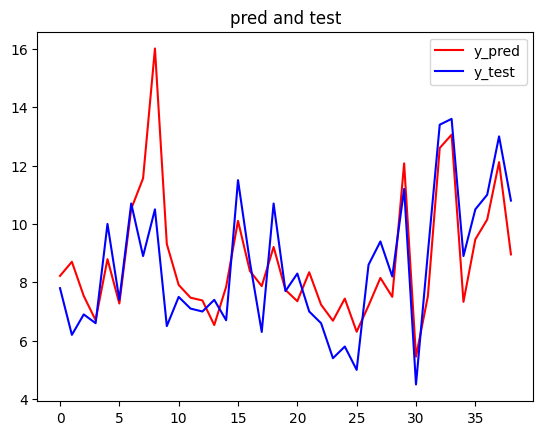

In [ ]:
# 測試集的預測值與其對應實際值折線圖
item = range(len(y_test))


plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y_test, 'b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

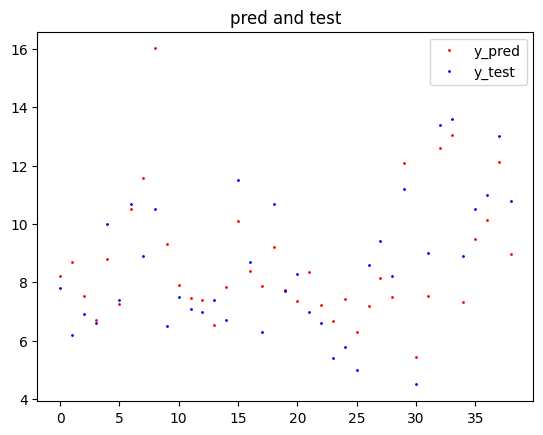

In [ ]:
# 測試集的預測值與其對應實際值點狀圖
item = range(len(y_test))


plt.plot(item, y_pred, 'o', markersize=1, color='r', label='y_pred')

plt.plot(item, y_test, 'o', markersize=1, color='b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

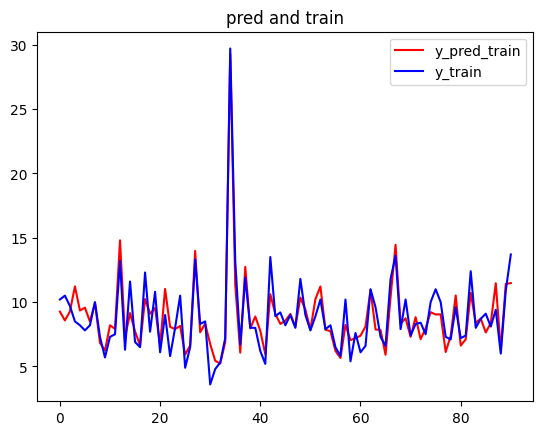

In [ ]:
# 訓練集的預測值與其對應實際值折線圖
item = range(len(y_train))



plt.plot(item, y_pred_train, 'r', label='y_pred_train')

plt.plot(item, y_train, 'b', label='y_train')
plt.title('pred and train')
plt.legend()
plt.show()

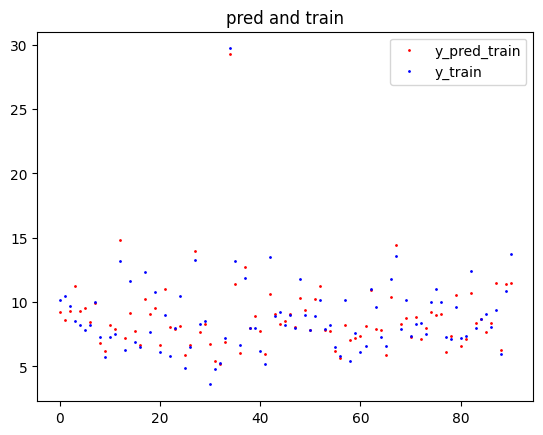

In [ ]:
# 訓練集的預測值與其對應實際值點狀圖
item = range(len(y_train))



plt.plot(item, y_pred_train, 'o', markersize=1, color='r', label='y_pred_train')

plt.plot(item, y_train, 'o', markersize=1, color='b', label='y_train')
plt.title('pred and train')
plt.legend()
plt.show()

In [ ]:
# 每一筆測試集資料誤差值
print("誤差值")
difference = []

for ii in range(len(y_pred)):
  d = float(y_test[ii]) - float(y_pred[ii])
  print(d)
  difference.append(d)

誤差值
-0.42039604187011737
-2.5037973403930662
-0.6321674346923825
-0.10226478576660192
1.205718994140625
0.12618484497070348
0.18362445831298757
-2.6623750686645504
-5.511587142944336
-2.8133583068847656
-0.4108390808105469
-0.37309780120849645
-0.37845420837402344
0.8637517929077152
-1.1467988967895506
1.3948554992675781
0.310369682312011
-1.570358467102051
1.4884063720703118
-0.03849487304687482
0.9463546752929695
-1.3455677032470703
-0.6329521179199222
-1.284357643127441
-1.6420261383056642
-1.3073339462280273
1.3986297607421871
1.249373817443848
0.6977016448974602
-0.8755729675292976
-0.9524574279785156
1.4780941009521484
0.7975772857666019
0.5411001205444332
1.5690120697021488
1.02783203125
0.8489189147949219
0.8830451965332031
1.842880058288575


In [ ]:
difference

[-0.42039604187011737,
 -2.5037973403930662,
 -0.6321674346923825,
 -0.10226478576660192,
 1.205718994140625,
 0.12618484497070348,
 0.18362445831298757,
 -2.6623750686645504,
 -5.511587142944336,
 -2.8133583068847656,
 -0.4108390808105469,
 -0.37309780120849645,
 -0.37845420837402344,
 0.8637517929077152,
 -1.1467988967895506,
 1.3948554992675781,
 0.310369682312011,
 -1.570358467102051,
 1.4884063720703118,
 -0.03849487304687482,
 0.9463546752929695,
 -1.3455677032470703,
 -0.6329521179199222,
 -1.284357643127441,
 -1.6420261383056642,
 -1.3073339462280273,
 1.3986297607421871,
 1.249373817443848,
 0.6977016448974602,
 -0.8755729675292976,
 -0.9524574279785156,
 1.4780941009521484,
 0.7975772857666019,
 0.5411001205444332,
 1.5690120697021488,
 1.02783203125,
 0.8489189147949219,
 0.8830451965332031,
 1.842880058288575]

In [ ]:
len(difference)

39

In [ ]:
# 測試集資料 test difference 標準差

print("test difference : " + str(difference))

st_dif = np.std(difference)

print("Standard deviation of the test difference: " + str(st_dif))

test difference : [-0.42039604187011737, -2.5037973403930662, -0.6321674346923825, -0.10226478576660192, 1.205718994140625, 0.12618484497070348, 0.18362445831298757, -2.6623750686645504, -5.511587142944336, -2.8133583068847656, -0.4108390808105469, -0.37309780120849645, -0.37845420837402344, 0.8637517929077152, -1.1467988967895506, 1.3948554992675781, 0.310369682312011, -1.570358467102051, 1.4884063720703118, -0.03849487304687482, 0.9463546752929695, -1.3455677032470703, -0.6329521179199222, -1.284357643127441, -1.6420261383056642, -1.3073339462280273, 1.3986297607421871, 1.249373817443848, 0.6977016448974602, -0.8755729675292976, -0.9524574279785156, 1.4780941009521484, 0.7975772857666019, 0.5411001205444332, 1.5690120697021488, 1.02783203125, 0.8489189147949219, 0.8830451965332031, 1.842880058288575]
Standard deviation of the test difference: 1.5004688275851448


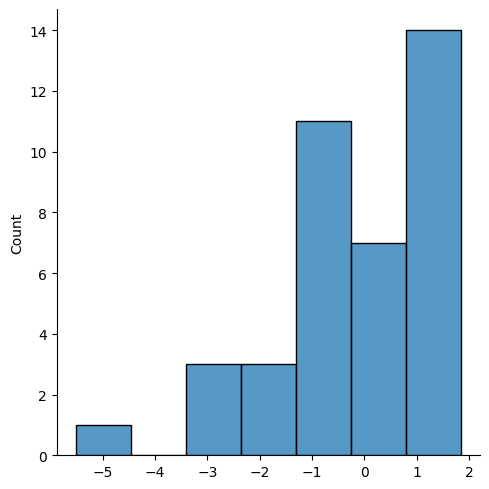

In [ ]:
# (測試集資料)各誤差值區間個數長條圖
import seaborn as sns
x = difference
sns.displot(x,aspect = 1)

In [ ]:
# 每一筆訓練集資料誤差值
print("誤差值")
difference_train = []

for ii in range(len(y_pred_train)):
  d = float(y_train[ii]) - float(y_pred_train[ii])
  print(d)
  difference_train.append(d)

誤差值
0.9418270111083977
1.9243507385253906
0.4301807403564446
-2.7194738388061523
-1.1450679779052741
-1.76668758392334
-0.2814453125000007
0.04458045959472656
0.47410373687744123
-0.5388134002685545
-0.8993694305419924
-0.4166545867919922
-1.598887252807618
-0.9415685653686525
2.4489446640014645
-0.8228755950927731
-0.13540363311767578
2.0655239105224616
-1.3987157821655272
1.2610967636108406
-0.5323013305664066
-2.020364761352539
-2.2676345825195314
0.09230613708496094
2.3545408248901367
-1.0197053909301754
-0.13231849670410156
-0.6771547317504876
0.6446693420410163
0.17740535736083984
-3.1405242919921874
-0.6398326873779299
0.07295303344726545
0.30096645355224627
0.42707557678222585
1.8319160461425774
0.6278545379638674
-0.8318229675292965
0.04869651794433594
-0.8817367553710938
-1.568843650817871
-0.7542312622070311
2.8955183029174805
-0.18089923858642543
0.8969623565673821
-0.35609989166259837
-0.07583904266357422
-0.08139705657958984
1.4470031738281257
-0.41152477264404297
-0.0543

In [ ]:
# 訓練集資料 train difference 標準差

print("train difference : " + str(difference_train))

st_dif = np.std(difference_train)

print("Standard deviation of the train difference: " + str(st_dif))

train difference : [0.9418270111083977, 1.9243507385253906, 0.4301807403564446, -2.7194738388061523, -1.1450679779052741, -1.76668758392334, -0.2814453125000007, 0.04458045959472656, 0.47410373687744123, -0.5388134002685545, -0.8993694305419924, -0.4166545867919922, -1.598887252807618, -0.9415685653686525, 2.4489446640014645, -0.8228755950927731, -0.13540363311767578, 2.0655239105224616, -1.3987157821655272, 1.2610967636108406, -0.5323013305664066, -2.020364761352539, -2.2676345825195314, 0.09230613708496094, 2.3545408248901367, -1.0197053909301754, -0.13231849670410156, -0.6771547317504876, 0.6446693420410163, 0.17740535736083984, -3.1405242919921874, -0.6398326873779299, 0.07295303344726545, 0.30096645355224627, 0.42707557678222585, 1.8319160461425774, 0.6278545379638674, -0.8318229675292965, 0.04869651794433594, -0.8817367553710938, -1.568843650817871, -0.7542312622070311, 2.8955183029174805, -0.18089923858642543, 0.8969623565673821, -0.35609989166259837, -0.07583904266357422, -0.08

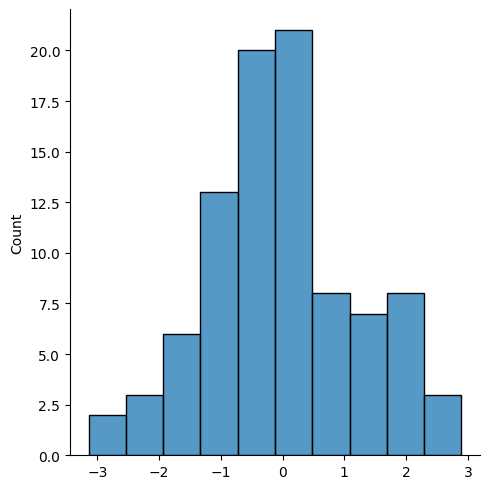

In [ ]:
# (訓練集資料)各誤差值區間個數長條圖
import seaborn as sns
x = difference_train
sns.displot(x,aspect = 1)

In [ ]:
# LR模型R^2(測試集)
r = r2_score(y_test,y_pred)

print(r)

0.5596230629418798


In [ ]:
# LR模型偏差值(截距)
model.intercept_

17.300451

In [ ]:
# LR模型各項特徵係數
model.coef_

array([-2.1274195 , -3.6382778 ,  0.22809756,  0.4887582 , -0.03903604,
        0.28575063], dtype=float32)

In [ ]:
# LR模型特徵係數個數
len(model.coef_)

6

In [ ]:
# LR模型R^2(訓練集)
from sklearn.metrics import r2_score

y_pred_train = model.predict(x_train)

r2 = r2_score(y_train,y_pred_train)

print(r2)

0.8530308953392594


# **輸出模型預測結果CSV**




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/111_人工智慧學程/20231213_牡蠣資料庫4屬性相關性分析,篩選和label關係強的特徵/20231208_Oyster4_data(130).csv")
df

,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight
0,1.0,6.9,7.8,4.1,2.5,31.98,79.950,28.1,20.7,0.256228,0.2,7.2
1,2.0,6.3,7.8,5.2,3.6,40.56,146.016,50.0,42.4,0.180000,-1.4,9.0
2,3.0,9.1,10.5,4.6,2.1,48.30,101.430,38.0,27.1,0.281579,0.2,10.7
3,4.0,6.7,8.2,4.3,2.4,35.26,84.624,34.6,24.8,0.303468,-0.7,10.5
4,5.0,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
125,126.0,7.3,8.4,4.1,1.6,34.44,55.104,30.9,22.1,0.281553,0.1,8.7
126,127.0,6.9,7.5,4.6,2.3,34.50,79.350,30.6,20.8,0.297386,0.7,9.1
127,128.0,7.6,8.4,3.7,1.6,31.08,49.728,23.2,15.7,0.280172,1.0,6.5
128,129.0,6.8,8.3,4.4,2.2,36.52,80.344,34.6,23.5,0.294798,0.9,10.2


In [ ]:
yy = df.iloc[:,:].values

In [ ]:
from sklearn.model_selection import train_test_split

yy_train, yy_test = train_test_split(yy,test_size=3/10,random_state=0)

In [ ]:
yy_train

array([[ 96.        ,   6.1       ,   6.6       , ...,   0.28412256,
          1.1       ,  10.2       ],
       [  4.        ,   6.7       ,   8.2       , ...,   0.30346821,
         -0.7       ,  10.5       ],
       [ 44.        ,   7.9       ,   8.6       , ...,   0.26287263,
          0.4       ,   9.7       ],
       ...,
       [ 65.        ,   7.3       ,   8.1       , ...,   0.25104603,
          1.4       ,   6.        ],
       [118.        ,   7.1       ,   7.7       , ...,   0.24604966,
          2.8       ,  10.9       ],
       [ 48.        ,   7.4       ,   8.6       , ...,   0.31278539,
          0.6       ,  13.7       ]])

In [ ]:
yy_test

array([[ 9.00000000e+00,  7.80000000e+00,  9.20000000e+00,
         3.90000000e+00,  1.90000000e+00,  3.58800000e+01,
         6.81720000e+01,  3.28000000e+01,  2.59000000e+01,
         2.37804878e-01, -9.00000000e-01,  7.80000000e+00],
       [ 6.00000000e+01,  8.10000000e+00,  9.00000000e+00,
         4.50000000e+00,  2.80000000e+00,  4.05000000e+01,
         1.13400000e+02,  3.82000000e+01,  2.92000000e+01,
         1.62303665e-01,  2.80000000e+00,  6.20000000e+00],
       [ 9.30000000e+01,  7.50000000e+00,  7.70000000e+00,
         4.60000000e+00,  1.80000000e+00,  3.54200000e+01,
         6.37560000e+01,  2.84000000e+01,  2.07000000e+01,
         2.42957746e-01,  8.00000000e-01,  6.90000000e+00],
       [ 1.05000000e+02,  6.00000000e+00,  7.00000000e+00,
         4.60000000e+00,  1.80000000e+00,  3.22000000e+01,
         5.79600000e+01,  2.50000000e+01,  1.75000000e+01,
         2.64000000e-01,  9.00000000e-01,  6.60000000e+00],
       [ 9.80000000e+01,  6.90000000e+00,  8.0000000

In [ ]:
len(yy_test)

39

In [ ]:
# 測試LR模型結果表(測試集)輸出
import csv
with open("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_test_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(["牡蠣原始編號 Oyster Original Number", "右殼長 Right Shell Length", "左殼長 Left Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height", "面積 Area", "體積 Volume",	"總重量 Total Weight", "殼重 Shell Weight", "肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)", "雜質重 Impurity Weight", "肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_test)):
    yy_test_ind = list(yy_test[ind])

    yy_test_ind.append(y_test[ind]) #準確值
    yy_test_ind.append(float(y_pred[ind])) #預測值
    yy_test_ind.append(float(y_test[ind] - y_pred[ind])) #誤差值
    writer.writerow(yy_test_ind)

  writer.writerow(["Standard deviation of the test difference:", np.std(difference)])





In [ ]:
import csv
with open("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_test_data.csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

['牡蠣原始編號 Oyster Original Number', '右殼長 Right Shell Length', '左殼長 Left Shell Length', '殼寬 Shell Width', '殼高 Shell Height', '面積 Area', '體積 Volume', '總重量 Total Weight', '殼重 Shell Weight', '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '雜質重 Impurity Weight', '肉重 Meat Weight', '準確值 Accurate value', '預測值 Predicted value', '誤差值 Error value']
['9.0', '7.8', '9.2', '3.9', '1.9', '35.879999999999995', '68.17199999999998', '32.8', '25.9', '0.2378048780487805', '-0.8999999999999986', '7.8', '7.8', '8.220396041870117', '-0.42039604187011737']
['60.0', '8.1', '9.0', '4.5', '2.8', '40.5', '113.4', '38.2', '29.2', '0.1623036649214659', '2.8000000000000043', '6.2', '6.2', '8.703797340393066', '-2.5037973403930662']
['93.0', '7.5', '7.7', '4.6', '1.8', '35.419999999999995', '63.75599999999999', '28.4', '20.7', '0.2429577464788732', '0.7999999999999972', '6.9', '6.9', '7.532167434692383', '-0.6321674346923825']
['105.0', '6.0', '7.0', '4.6', '1.8', '32.2', '57.96', '25.0', '17.5', '0.26

In [ ]:
# 測試LR模型結果表(訓練集)輸出
import csv
with open("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_train_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["牡蠣原始編號 Oyster Original Number", "右殼長 Right Shell Length", "左殼長 Left Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height", "面積 Area", "體積 Volume",	"總重量 Total Weight", "殼重 Shell Weight", "肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)", "雜質重 Impurity Weight", "肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_train)):
    yy_train_ind = list(yy_train[ind])
    # yy_train_ind.append(yy_train[ind][1]*yy_train[ind][2]) #面積
    # yy_train_ind.append(yy_train[ind][1]*yy_train[ind][2]*yy_train[ind][3]) #體積
    yy_train_ind.append(y_train[ind]) #準確值
    yy_train_ind.append(float(y_pred_train[ind])) #預測值
    yy_train_ind.append(float(y_train[ind] - y_pred_train[ind])) #誤差值
    writer.writerow(yy_train_ind)

  writer.writerow(["Standard deviation of the train difference:", np.std(difference_train)])



    # writer.writerow([1, 2, 3])
    # writer.writerow([4, 5, 6])
    # writer.writerow([7, 8, 9])

In [ ]:
import csv
with open("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_train_data.csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

['牡蠣原始編號 Oyster Original Number', '右殼長 Right Shell Length', '左殼長 Left Shell Length', '殼寬 Shell Width', '殼高 Shell Height', '面積 Area', '體積 Volume', '總重量 Total Weight', '殼重 Shell Weight', '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '雜質重 Impurity Weight', '肉重 Meat Weight', '準確值 Accurate value', '預測值 Predicted value', '誤差值 Error value']
['96.0', '6.1', '6.6', '4.4', '2.7', '29.04', '78.408', '35.9', '24.6', '0.2841225626740947', '1.1000000000000014', '10.2', '10.2', '9.258172988891602', '0.9418270111083977']
['4.0', '6.7', '8.2', '4.3', '2.4', '35.26', '84.624', '34.6', '24.8', '0.3034682080924855', '-0.6999999999999957', '10.5', '10.5', '8.57564926147461', '1.9243507385253906']
['44.0', '7.9', '8.6', '4.5', '2.2', '38.7', '85.14', '36.9', '26.8', '0.2628726287262872', '0.3999999999999986', '9.7', '9.7', '9.269819259643555', '0.4301807403564446']
['7.0', '8.2', '9.4', '4.2', '2.1', '39.48', '82.90800000000002', '44.3', '35.6', '0.1918735891647855', '0.1999999999999957',

In [ ]:
# 測試LR模型結果表(測試集)
df_test = pd.read_csv("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_test_data.csv")
df_test

,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight,準確值 Accurate value,預測值 Predicted value,誤差值 Error value
0,9.0,7.800000,9.2,3.9,1.9,35.88,68.172,32.8,25.9,0.237805,-0.9,7.8,7.8,8.220396,-0.420396
1,60.0,8.100000,9.0,4.5,2.8,40.50,113.400,38.2,29.2,0.162304,2.8,6.2,6.2,8.703797,-2.503797
2,93.0,7.500000,7.7,4.6,1.8,35.42,63.756,28.4,20.7,0.242958,0.8,6.9,6.9,7.532167,-0.632167
3,105.0,6.000000,7.0,4.6,1.8,32.20,57.960,25.0,17.5,0.264000,0.9,6.6,6.6,6.702265,-0.102265
4,98.0,6.900000,8.0,4.7,2.3,37.60,86.480,35.3,24.9,0.283286,0.4,10.0,10.0,8.794281,1.205719
5,31.0,7.100000,8.5,4.0,2.4,34.00,81.600,30.2,20.0,0.245033,2.8,7.4,7.4,7.273815,0.126185
6,45.0,6.900000,7.8,4.0,2.6,31.20,81.120,40.9,29.0,0.261614,1.2,10.7,10.7,10.516376,0.183624
7,34.0,8.300000,9.4,4.2,2.1,39.48,82.908,45.5,36.4,0.195604,0.2,8.9,8.9,11.562375,-2.662375
8,64.0,9.000000,9.4,5.5,2.0,51.70,103.400,59.6,48.7,0.176174,0.4,10.5,10.5,16.011587,-5.511587
9,27.0,7.400000,8.3,4.6,1.9,38.18,72.542,35.5,28.9,0.183099,0.1,6.5,6.5,9.313358,-2.813358


In [ ]:
# 測試LR模型結果表(訓練集)
df_train = pd.read_csv("20240515_sklearn_linear_model_OriginalData(130)_AllFeature_UnincludeRightShellLength_train_data.csv")
df_train

,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight,準確值 Accurate value,預測值 Predicted value,誤差值 Error value
0,96.0,6.100000,6.6,4.4,2.7,29.04,78.408,35.9,24.6,0.284123,1.1,10.2,10.2,9.258173,0.941827
1,4.0,6.700000,8.2,4.3,2.4,35.26,84.624,34.6,24.8,0.303468,-0.7,10.5,10.5,8.575649,1.924351
2,44.0,7.900000,8.6,4.5,2.2,38.70,85.140,36.9,26.8,0.262873,0.4,9.7,9.7,9.269819,0.430181
3,7.0,8.200000,9.4,4.2,2.1,39.48,82.908,44.3,35.6,0.191874,0.2,8.5,8.5,11.219474,-2.719474
4,85.0,7.400000,8.8,4.5,1.9,39.60,75.240,36.0,26.4,0.227778,1.4,8.2,8.2,9.345068,-1.145068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,68.0,8.500000,9.6,5.0,2.1,48.00,100.800,44.7,34.5,0.210291,0.8,9.4,9.4,11.463455,-2.063455
88,65.0,7.300000,8.1,4.7,1.7,38.07,64.719,23.9,16.5,0.251046,1.4,6.0,6.0,6.266309,-0.266309
89,118.0,7.100000,7.7,3.2,3.5,24.64,86.240,44.3,30.6,0.246050,2.8,10.9,10.9,11.410460,-0.510460
90,48.0,7.400000,8.6,4.7,2.0,40.42,80.840,43.8,29.5,0.312785,0.6,13.7,13.7,11.476744,2.223256


# **依據實際重量由小到大排序與其預測重量做分析_sklearn.linear_model**

In [ ]:
def BubbleSort(data,data2):
    n = len(data)
    while n > 1:
        n-=1
        for i in range(n):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                data2[i], data2[i+1] = data2[i+1], data2[i]
    return data,data2

**test 測試集**

In [ ]:
y_test.shape

(39,)

In [ ]:
y_test

array([ 7.8,  6.2,  6.9,  6.6, 10. ,  7.4, 10.7,  8.9, 10.5,  6.5,  7.5,
        7.1,  7. ,  7.4,  6.7, 11.5,  8.7,  6.3, 10.7,  7.7,  8.3,  7. ,
        6.6,  5.4,  5.8,  5. ,  8.6,  9.4,  8.2, 11.2,  4.5,  9. , 13.4,
       13.6,  8.9, 10.5, 11. , 13. , 10.8])

In [ ]:
y_pred.shape

(39,)

In [ ]:
y_pred

array([ 8.220396 ,  8.703797 ,  7.5321674,  6.702265 ,  8.794281 ,
        7.273815 , 10.516376 , 11.562375 , 16.011587 ,  9.313358 ,
        7.910839 ,  7.473098 ,  7.378454 ,  6.536248 ,  7.846799 ,
       10.1051445,  8.38963  ,  7.8703585,  9.211594 ,  7.738495 ,
        7.3536453,  8.345568 ,  7.232952 ,  6.6843576,  7.442026 ,
        6.307334 ,  7.2013702,  8.150626 ,  7.5022984, 12.075573 ,
        5.4524574,  7.521906 , 12.602423 , 13.0589   ,  7.330988 ,
        9.472168 , 10.151081 , 12.116955 ,  8.95712  ], dtype=float32)

In [ ]:
y_test_sort = y_test.reshape(y_test.shape[0])
y_pred_sort = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_test_sort.shape

(39,)

In [ ]:
y_pred_sort.shape

(39,)

In [ ]:
y_test_sort

array([ 7.8,  6.2,  6.9,  6.6, 10. ,  7.4, 10.7,  8.9, 10.5,  6.5,  7.5,
        7.1,  7. ,  7.4,  6.7, 11.5,  8.7,  6.3, 10.7,  7.7,  8.3,  7. ,
        6.6,  5.4,  5.8,  5. ,  8.6,  9.4,  8.2, 11.2,  4.5,  9. , 13.4,
       13.6,  8.9, 10.5, 11. , 13. , 10.8])

In [ ]:
y_pred_sort

array([ 8.220396 ,  8.703797 ,  7.5321674,  6.702265 ,  8.794281 ,
        7.273815 , 10.516376 , 11.562375 , 16.011587 ,  9.313358 ,
        7.910839 ,  7.473098 ,  7.378454 ,  6.536248 ,  7.846799 ,
       10.1051445,  8.38963  ,  7.8703585,  9.211594 ,  7.738495 ,
        7.3536453,  8.345568 ,  7.232952 ,  6.6843576,  7.442026 ,
        6.307334 ,  7.2013702,  8.150626 ,  7.5022984, 12.075573 ,
        5.4524574,  7.521906 , 12.602423 , 13.0589   ,  7.330988 ,
        9.472168 , 10.151081 , 12.116955 ,  8.95712  ], dtype=float32)

In [ ]:
BubbleSort(y_test_sort,y_pred_sort)

print(y_test_sort)
print(y_pred_sort)

[ 4.5  5.   5.4  5.8  6.2  6.3  6.5  6.6  6.6  6.7  6.9  7.   7.   7.1
  7.4  7.4  7.5  7.7  7.8  8.2  8.3  8.6  8.7  8.9  8.9  9.   9.4 10.
 10.5 10.5 10.7 10.7 10.8 11.  11.2 11.5 13.  13.4 13.6]
[ 5.4524574  6.307334   6.6843576  7.442026   8.703797   7.8703585
  9.313358   6.702265   7.232952   7.846799   7.5321674  7.378454
  8.345568   7.473098   7.273815   6.536248   7.910839   7.738495
  8.220396   7.5022984  7.3536453  7.2013702  8.38963   11.562375
  7.330988   7.521906   8.150626   8.794281  16.011587   9.472168
 10.516376   9.211594   8.95712   10.151081  12.075573  10.1051445
 12.116955  12.602423  13.0589   ]


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

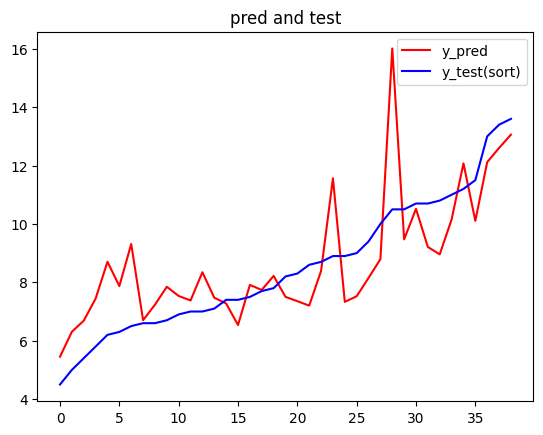

In [ ]:
# 測試集資料的預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y_test))



plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y_test, 'b', label='y_test(sort)')
plt.title('pred and test')
plt.legend()
plt.show()

**train 訓練集**

In [ ]:
y_train_sort = y_train.reshape(y_train.shape[0])
y_pred_train_sort = y_pred_train.reshape(y_pred_train.shape[0])

In [ ]:
y_train_sort.shape

(91,)

In [ ]:
y_pred_train_sort.shape

(91,)

In [ ]:
y_train_sort

array([10.2, 10.5,  9.7,  8.5,  8.2,  7.8,  8.2, 10. ,  7.3,  5.7,  7.3,
        7.5, 13.2,  6.3, 11.6,  6.9,  6.5, 12.3,  7.7, 10.8,  6.1,  9. ,
        5.8,  8. , 10.5,  4.9,  6.5, 13.3,  8.3,  8.5,  3.6,  4.8,  5.3,
        7.2, 29.7, 13.2,  6.7, 11.9,  8. ,  8. ,  6.2,  5.2, 13.5,  8.9,
        9.2,  8.2,  9. ,  8. , 11.8,  9. ,  7.8,  8.9, 10.2,  7.9,  8.2,
        6.5,  5.8, 10.2,  5.4,  7.6,  6.1,  6.6, 11. ,  9.6,  7.3,  6.6,
       11.8, 13.6,  7.9, 10.2,  7.4,  8.3,  8.4,  7.5, 10. , 11. , 10. ,
        7.3,  7.1,  9.6,  7.2,  7.4, 12.4,  8. ,  8.7,  9.1,  8.1,  9.4,
        6. , 10.9, 13.7])

In [ ]:
y_pred_train_sort

array([ 9.258173 ,  8.575649 ,  9.269819 , 11.219474 ,  9.345068 ,
        9.566688 ,  8.481445 ,  9.95542  ,  6.8258963,  6.2388134,
        8.199369 ,  7.9166546, 14.798887 ,  7.2415686,  9.151055 ,
        7.7228756,  6.6354036, 10.234476 ,  9.098716 ,  9.538903 ,
        6.6323013, 11.020365 ,  8.067635 ,  7.907694 ,  8.145459 ,
        5.9197054,  6.6323185, 13.977155 ,  7.6553307,  8.322595 ,
        6.7405243,  5.4398327,  5.227047 ,  6.8990335, 29.272924 ,
       11.368084 ,  6.0721455, 12.731823 ,  7.9513035,  8.881737 ,
        7.7688437,  5.9542313, 10.604482 ,  9.080899 ,  8.303038 ,
        8.5561   ,  9.075839 ,  8.081397 , 10.352997 ,  9.411525 ,
        7.854397 , 10.225732 , 11.211768 ,  7.8533583,  7.7402754,
        6.2122917,  5.658369 ,  8.223072 ,  7.044986 ,  7.192218 ,
        7.3895617,  8.104708 , 10.943428 ,  7.8728848,  7.8342066,
        5.906108 , 10.38562  , 14.45388  ,  8.331651 ,  8.73637  ,
        7.302207 ,  8.83055  ,  7.119009 ,  7.9633455,  9.2165

In [ ]:
BubbleSort(y_train_sort,y_pred_train_sort)

print(y_train_sort)
print(y_pred_train_sort)

[ 3.6  4.8  4.9  5.2  5.3  5.4  5.7  5.8  5.8  6.   6.1  6.1  6.2  6.3
  6.5  6.5  6.5  6.6  6.6  6.7  6.9  7.1  7.2  7.2  7.3  7.3  7.3  7.3
  7.4  7.4  7.5  7.5  7.6  7.7  7.8  7.8  7.9  7.9  8.   8.   8.   8.
  8.   8.1  8.2  8.2  8.2  8.2  8.3  8.3  8.4  8.5  8.5  8.7  8.9  8.9
  9.   9.   9.   9.1  9.2  9.4  9.6  9.6  9.7 10.  10.  10.  10.2 10.2
 10.2 10.2 10.5 10.5 10.8 10.9 11.  11.  11.6 11.8 11.8 11.9 12.3 12.4
 13.2 13.2 13.3 13.5 13.6 13.7 29.7]
[ 6.7405243  5.4398327  5.9197054  5.9542313  5.227047   7.044986
  6.2388134  8.067635   5.658369   6.266309   6.6323013  7.3895617
  7.7688437  7.2415686  6.6354036  6.6323185  6.2122917  8.104708
  5.906108   6.0721455  7.7228756  7.37599    6.8990335  6.6217937
  6.8258963  8.199369   7.8342066  6.1208677  7.302207   7.105055
  7.9166546  7.9633455  7.192218   9.098716   9.566688   7.854397
  7.8533583  8.331651   7.907694   7.9513035  8.881737   8.081397
  8.386664   8.3683815  9.345068   8.481445   8.5561     7.7402754
  7.655

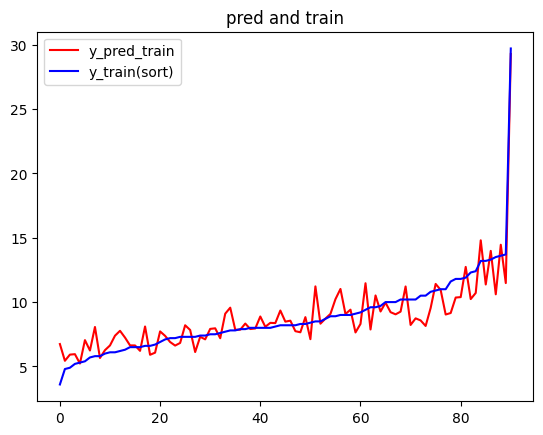

In [ ]:
# 訓練集資料的預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y_train))



plt.plot(item, y_pred_train, 'r', label='y_pred_train')

plt.plot(item, y_train, 'b', label='y_train(sort)')
plt.title('pred and train')
plt.legend()
plt.show()